In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score # 导入轮廓系数指标
from sklearn.cluster import KMeans # KMeans模块
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [91]:
#加载样本数据：ad_performance.csv
data = pd.read_csv('./Hair-cleanYesNo.csv')
data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [92]:
#保留一份原始数据:data
op_data = data.copy()
op_data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [93]:
#检测哪些列出现缺失值
op_data.isnull().any()

Id                          False
Genetics                    False
Hormonal_Changes            False
Medical_Conditions          False
Medications_Treatments      False
Nutritional_Deficiencies    False
Stress                      False
Age                         False
Poor_Hair_Care_Habits       False
Environmental_Factors       False
Smoking                     False
Weight_Loss                 False
Hair Loss                   False
dtype: bool

In [94]:
#检测是否出现重复的行数据
op_data.duplicated().sum()

0

In [95]:
# 删除无用id列
op_data.drop('Id', axis = 1, inplace= True)
op_data.head()

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [96]:
# 根据字典进行特征值化
# 压力替换数字表示
dic_stress = {
    'Low':1,
    'Moderate':2,
    'High':3
}
op_data['Stress'] = op_data['Stress'].map(dic_stress)
# 病史字典替换
dic_mc={
    'Alopecia Areata':1,
    'Androgenetic Alopecia':2,
    'Dermatitis':3,
    'Dermatosis':4,
    'Eczema':5,
    'Psoriasis':6,
    'Ringworm':7,
    'Scalp Infection':8,
    'Seborrheic Dermatitis':9,
    'Thyroid Problems':10,
    'No Data':11
}
op_data['Medical_Conditions'] = op_data['Medical_Conditions'].map(dic_mc)
# 药物治疗史替换
dic_mt={
    'Accutane':1,
    'Antibiotics':2,
    'Antidepressants':3,
    'Antifungal Cream':4,
    'Blood Pressure Medication':5,
    'Chemotherapy':6,
    'Heart Medication' :7,
    'Immunomodulators':8,
    'Rogaine':9,
    'Steroids':10,
    'No Data':11
}
op_data['Medications_Treatments'] = op_data['Medications_Treatments'].map(dic_mt)
# 营养不足情况替换
dic_nd={
    'Biotin Deficiency' :1,
    'Iron deficiency':2,
    'Magnesium deficiency':3,
    'Omega-3 fatty acids':4,
    'Protein deficiency':5,
    'Selenium deficiency':6,
    'Vitamin A Deficiency':7,
    'Vitamin D Deficiency':8,
    'Vitamin E deficiency':9,
    'Zinc Deficiency':10,
    'No Data':11
}
op_data['Nutritional_Deficiencies'] = op_data['Nutritional_Deficiencies'].map(dic_nd)


In [97]:
op_data.isnull().any()

Genetics                    False
Hormonal_Changes            False
Medical_Conditions          False
Medications_Treatments      False
Nutritional_Deficiencies    False
Stress                      False
Age                         False
Poor_Hair_Care_Habits       False
Environmental_Factors       False
Smoking                     False
Weight_Loss                 False
Hair Loss                   False
dtype: bool

<Axes: >

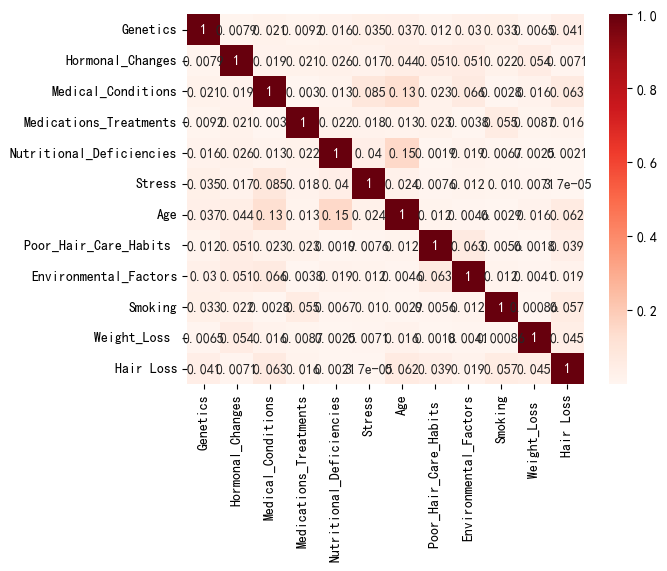

In [98]:
import seaborn as sns
corr = op_data.corr().abs()
sns.heatmap(corr,cmap='Reds',annot=True)

In [115]:
# 由于已经对数据进行过map和true，false替换，所以直接进行无量纲化操作
from sklearn.preprocessing import MinMaxScaler
tool = MinMaxScaler()
ret = tool.fit_transform(op_data.iloc[:,0:12])
#将ret封装成DataFrame
from pandas import DataFrame
cols = op_data.columns[:12]
new_data = DataFrame(data=ret,columns=cols)
new_data

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,1.0,0.0,1.0,1.0,0.2,0.5,0.03125,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.4,0.1,0.2,1.0,0.78125,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.3,0.3,0.4,0.5,0.25000,1.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.6,0.1,0.0,0.5,0.87500,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.5,0.0,0.1,0.5,0.37500,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.0,0.0,0.8,0.8,0.6,0.0,0.46875,1.0,1.0,1.0,1.0,1.0
995,1.0,1.0,1.0,0.0,0.4,0.0,0.90625,0.0,0.0,0.0,1.0,0.0
996,0.0,1.0,0.1,0.2,0.4,0.5,0.06250,1.0,0.0,1.0,1.0,1.0
997,0.0,1.0,0.2,0.7,0.0,0.5,0.43750,1.0,1.0,1.0,1.0,1.0


# 建模
通过平均轮廓系数检验得到最佳KMeans聚类模型

In [116]:
#按照之前找寻最优模型超参数的套路实现
ks = [2,3,4,5,6,7] #簇的个数的取值
scores = [] #保存模型对应不同的簇的轮廓系数的值
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(new_data)
    score = silhouette_score(new_data,model.labels_)
    scores.append(score)
ks = np.array(ks)
scores = np.array(scores)

best_index = np.argmax(scores)
best_k = ks[best_index]
best_k

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

4

In [117]:
#建模：
model = KMeans(n_clusters=best_k)
model.fit(new_data)
#获取每一个样本聚类的结果
labels = model.labels_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### 聚类结果特征分析与展示
通过上面模型，我们其实给每个观测（样本）打了个标签clusters，即他属于4类中的哪一类,将原始数据与聚类标签整合

In [118]:
data['cluster'] = labels
data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss,cluster
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0,3
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0,3
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0,1
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1,3


In [119]:
data['cluster'].value_counts().sort_index()

cluster
0    258
1    234
2    275
3    232
Name: count, dtype: int64

In [136]:
all_value_data = [] #存储数值型特征的显著特征
# all_str_data = [] #存储非数值型特征的显著特征

for k in range(4):#k的取值为0-3刚好可以作为每一个簇的标号
    #提取每一个簇对应的样本数据
    label_df = data.loc[data['cluster'] == k]
    #提取每一个簇中数值型特征的显著特征（每一个维度特征都需要进行显著特征的提取）
    value_s = label_df.iloc[:,1:].describe().loc['mean']
    #将每一个簇对应数值型特征的显著特征存储到all_value_data
    all_value_data.append(value_s)
    
    #处理每一个簇中非数值型列的显著特征
    # str_s = label_df.iloc[:,8:-1].describe().loc['max']
    # all_str_data.append(str_s)

In [137]:
#每一个簇对应的样本数量计算出来
df_cluster_count = DataFrame(data=data['cluster'].value_counts().sort_index()).T
df_cluster_count

cluster,0,1,2,3
count,258,234,275,232


In [138]:
#数值型特征的显著特征
value_cluster_df = DataFrame(data=all_value_data,index=[0,1,2,3]).T
value_cluster_df

,0,1,2,3
Genetics,1.000000,0.538462,0.501818,0.000000
Hormonal_Changes,0.000000,1.000000,1.000000,0.000000
Age,34.209302,34.008547,33.589091,35.056034
Poor_Hair_Care_Habits,0.496124,0.743590,0.232727,0.543103
Environmental_Factors,0.538760,0.756410,0.250909,0.530172
Smoking,0.488372,0.547009,0.516364,0.530172
Weight_Loss,0.488372,0.726496,0.207273,0.512931
Hair Loss,0.511628,0.534188,0.472727,0.474138
cluster,0.000000,1.000000,2.000000,3.000000
